In [2]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import f1_score, recall_score

default = pd.read_csv("default.csv")

In [3]:
default.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
default.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [5]:
default.isna().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

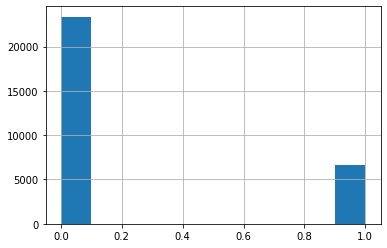

In [6]:
default["default payment next month"].hist()

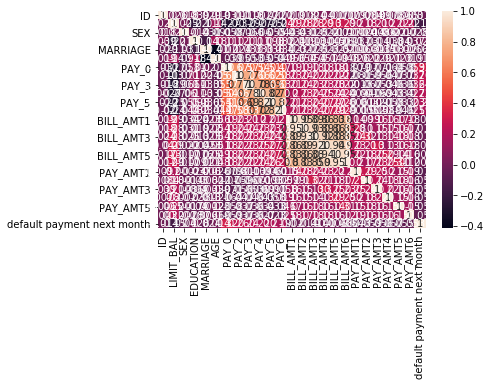

In [7]:
corrMatrix = default.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

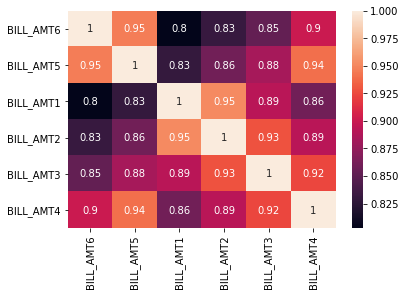

In [8]:
corrMatrix = default[{"BILL_AMT1", "BILL_AMT2", "BILL_AMT3", "BILL_AMT4", "BILL_AMT5", "BILL_AMT6"}].corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

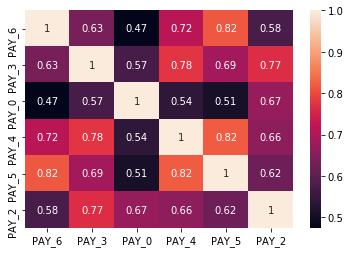

In [9]:
corrMatrix = default[{"PAY_0", "PAY_2", "PAY_3", "PAY_4", "PAY_5", "PAY_6"}].corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [10]:
default["PAY_AVE"] = default[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].mean(axis = 1)
default.drop(['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'], axis = 1, inplace = True)
default["BILL_AVE"] = default[["BILL_AMT1", "BILL_AMT2", "BILL_AMT3", "BILL_AMT4", "BILL_AMT5", "BILL_AMT6"]].mean(axis = 1)
default.drop(["BILL_AMT1", "BILL_AMT2", "BILL_AMT3", "BILL_AMT4", "BILL_AMT5", "BILL_AMT6"], axis = 1, inplace = True)

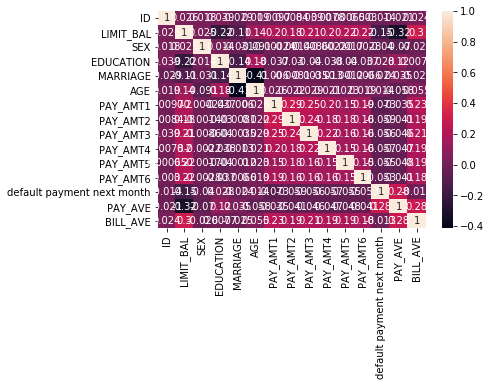

In [11]:
corrMatrix = default.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [12]:
default.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,PAY_AVE,BILL_AVE
0,1,20000,2,2,1,24,0,689,0,0,0,0,1,-0.333333,1284.000000
1,2,120000,2,2,2,26,0,1000,1000,1000,0,2000,1,0.500000,2846.166667
2,3,90000,2,2,2,34,1518,1500,1000,1000,1000,5000,0,0.000000,16942.166667
3,4,50000,2,2,1,37,2000,2019,1200,1100,1069,1000,0,0.000000,38555.666667
4,5,50000,1,2,1,57,2000,36681,10000,9000,689,679,0,-0.333333,18223.166667


In [13]:
X = default.drop(["default payment next month", "ID"], axis=1)
y = default[["default payment next month"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y)

In [14]:
y_train["default payment next month"].value_counts()

0    21028
1     5972
Name: default payment next month, dtype: int64

In [15]:
from imblearn.over_sampling import SMOTE
import imblearn
oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)

In [16]:
y_train["default payment next month"].value_counts()

1    21028
0    21028
Name: default payment next month, dtype: int64

In [17]:
clf = SGDClassifier()

In [ ]:
param_grid = [
  {'max_iter': np.linspace(start=1000, stop=2000, num=101), 'penalty': ['elasticnet'] ,'early_stopping': [True, False]},
  {'max_iter': np.linspace(start=1000, stop=2000, num=101), 'penalty': ['l1'], 'early_stopping': [True, False]},
  {'max_iter': np.linspace(start=1000, stop=2000, num=101), 'penalty': ['l2'], 'early_stopping': [True, False]}
 ]

search = GridSearchCV(clf, param_grid, cv=5)
search.fit(X_train, y_train.values.ravel())

train_preds = search.predict(X_train)

In [ ]:
search.best_params_

In [ ]:
print( "f1: ", accuracy_score(y_train, train_preds))
print( "recall: ", recall_score(y_train, train_preds, average='micro'))
print( "accuracy: ", recall_score(y_train, train_preds))

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
tn, fp, fn, tp = confusion_matrix(y_train, train_preds).ravel()
(tp, fp, tn, fn)

In [ ]:
search.score

In [ ]:
test_preds = np.array(search.predict(X_test))

In [ ]:
y_test = np.array(y_test)

In [ ]:
print( "f1: ", f1_score(y_test, test_preds))
print( "recall: ", recall_score(y_test, test_preds, average='micro'))
print( "accuracy: ", recall_score(y_test, test_preds))

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, test_preds).ravel()
(tp, fp, tn, fn)